In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cpODEmodel import cpODEmodel
from cpODEstep import cpODEstep, cpODEstepRK4, cpODEstepEuler
import pandas as pd

In [2]:
class ChemicalOscillatorModel(cpODEmodel):
    def __init__(self, s0, p, t0):
        """
        Initialize the chemical oscillator model.
        :param s0: Initial state vector [X, Y]
        :param p: Parameters [A, B]
        :param t0: Initial time
        """
        
        self._A = p[0]
        self._B = p[1]
        super().__init__(s0, p, t0)

    def getRate(self, t, s):
        """
        Compute the rate of change for the system of equations.
        :param t: Time
        :param s: Current state vector [X, Y]
        :return: Rate of change [dX/dt, dY/dt]
        """
        X, Y = s
        A, B = self._A, self._B
        dXdt = A - (B + 1) * X + X**2 * Y
        dYdt = B * X - X**2 * Y
        return np.array([dXdt, dYdt])


In [3]:
def simulate_oscillator(A, B, s0, t0,h,tmax):
    model = ChemicalOscillatorModel(s0, [A,B], t0)
    stepper = cpODEstepRK4(h, model)

    times = [t0]
    X_values = [s0[0]]
    Y_values = [s0[1]]

    while model.getTime() < tmax:
        stepper.step()
        times.append(model.getTime())
        X, Y = model.getState()
        X_values.append(X)
        Y_values.append(Y)

    return X_values, Y_values

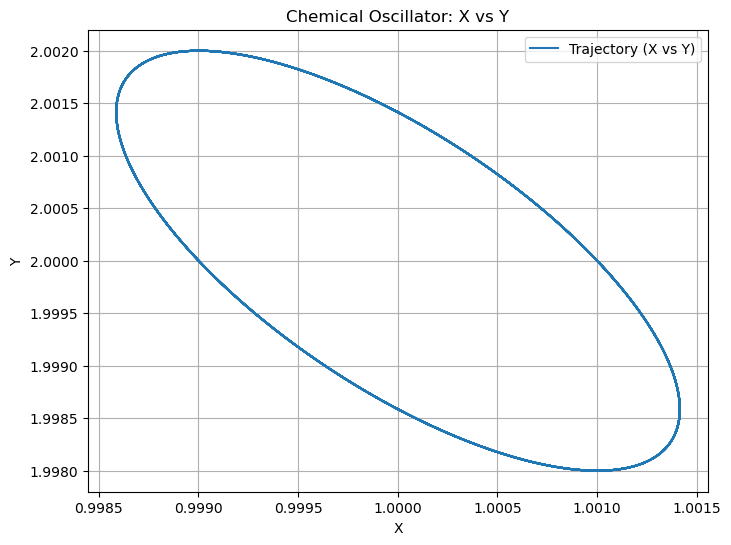

In [6]:
A = 1
B = 2
s0 = [A+0.001, B/A]
t0 = 0.0  
h = 0.01  
tmax = 50  
X_values, Y_values = simulate_oscillator(A, B, s0, t0, h, tmax)

plt.figure(figsize=(8, 6))
plt.plot(X_values, Y_values, label="Trajectory (X vs Y)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Chemical Oscillator: X vs Y")
plt.legend()
plt.grid()
plt.show()

In [315]:
def test_initial_conditions(A, B, X_range, Y_range, t0, h, tmax):
    
    final_states = []
    for X0 in X_range:
        for Y0 in Y_range:
            s0 = [X0, Y0]
            X_values, Y_values = simulate_oscillator(A, B, s0, t0, h, tmax)
            final_X = X_values[-1]  # Take the final value after simulation
            final_Y = Y_values[-1]
            final_states.append((X0, Y0, final_X, final_Y))
    return final_states

def plot_results(final_states):
   
    X0_vals = [state[0] for state in final_states]
    Y0_vals = [state[1] for state in final_states]
    X_final_vals = [state[2] for state in final_states]
    Y_final_vals = [state[3] for state in final_states]

    plt.figure(figsize=(8, 6))
    plt.scatter(X0_vals, Y0_vals, c='blue', label='Initial Conditions')
    plt.scatter(X_final_vals, Y_final_vals, c='red', label='Steady States')
    plt.xlabel('Initial X')
    plt.ylabel('Initial Y')
    plt.title('Steady State Behavior for Varying Initial Conditions')
    plt.legend()
    plt.grid()
    plt.show()

/var/folders/s3/ndy24kdj28j8g7cg4731vp600000gn/T/ipykernel_6973/1263926778.py:25: RuntimeWarning: overflow encountered in scalar multiply
  dXdt = A - (B + 1) * X + X**2 * Y
/var/folders/s3/ndy24kdj28j8g7cg4731vp600000gn/T/ipykernel_6973/1263926778.py:26: RuntimeWarning: overflow encountered in scalar multiply
  dYdt = B * X - X**2 * Y
/var/folders/s3/ndy24kdj28j8g7cg4731vp600000gn/T/ipykernel_6973/1263926778.py:25: RuntimeWarning: overflow encountered in scalar power
  dXdt = A - (B + 1) * X + X**2 * Y
/var/folders/s3/ndy24kdj28j8g7cg4731vp600000gn/T/ipykernel_6973/1263926778.py:26: RuntimeWarning: overflow encountered in scalar power
  dYdt = B * X - X**2 * Y


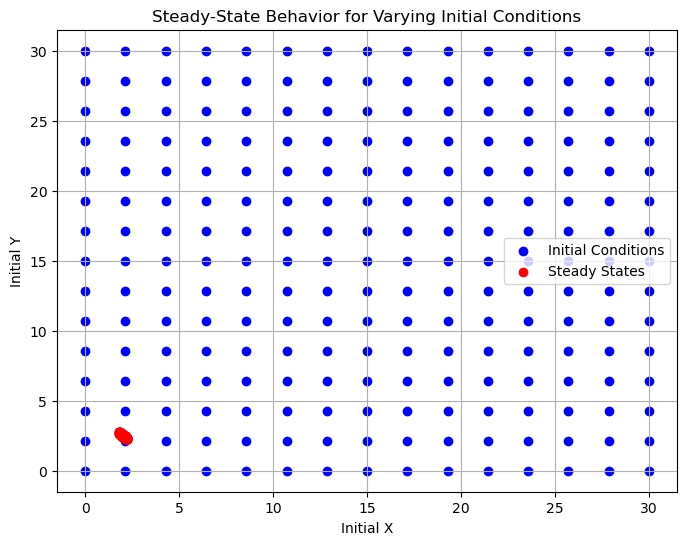

In [ ]:
A = 2  
B = 5  
t0 = 0.0  
h = 0.01 
tmax = 50  


X_range = np.linspace(0, 30, 15)  
Y_range = np.linspace(0, 30, 15)  


final_states = test_initial_conditions(A, B, X_range, Y_range, t0, h, tmax)

plot_results(final_states)

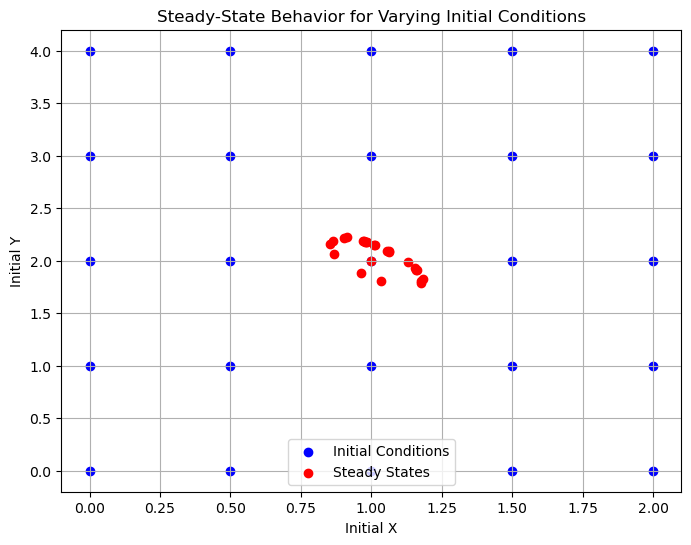

In [282]:
A = 1  
B = 2  
t0 = 0.0  
h = 0.01 
tmax = 50 

X_range = np.linspace(0, 2 * A, 5)  
Y_range = np.linspace(0, 2 * B / A, 5) 

final_states = test_initial_conditions(A, B, X_range, Y_range, t0, h, tmax)

plot_results(final_states)

/var/folders/s3/ndy24kdj28j8g7cg4731vp600000gn/T/ipykernel_6973/1263926778.py:25: RuntimeWarning: overflow encountered in scalar multiply
  dXdt = A - (B + 1) * X + X**2 * Y
/var/folders/s3/ndy24kdj28j8g7cg4731vp600000gn/T/ipykernel_6973/1263926778.py:26: RuntimeWarning: overflow encountered in scalar multiply
  dYdt = B * X - X**2 * Y
/Users/aaronrusk/Desktop/P410/P410/comp-phys-f24/library/python/cpODEstep.py:213: RuntimeWarning: invalid value encountered in add
  s += (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)
/var/folders/s3/ndy24kdj28j8g7cg4731vp600000gn/T/ipykernel_6973/1263926778.py:25: RuntimeWarning: overflow encountered in scalar power
  dXdt = A - (B + 1) * X + X**2 * Y
/var/folders/s3/ndy24kdj28j8g7cg4731vp600000gn/T/ipykernel_6973/1263926778.py:26: RuntimeWarning: overflow encountered in scalar power
  dYdt = B * X - X**2 * Y
/Users/aaronrusk/Desktop/P410/P410/comp-phys-f24/library/python/cpODEstep.py:208: RuntimeWarning: invalid value encountered in add
  k2 = h * dsdt(t+h/2., s+k

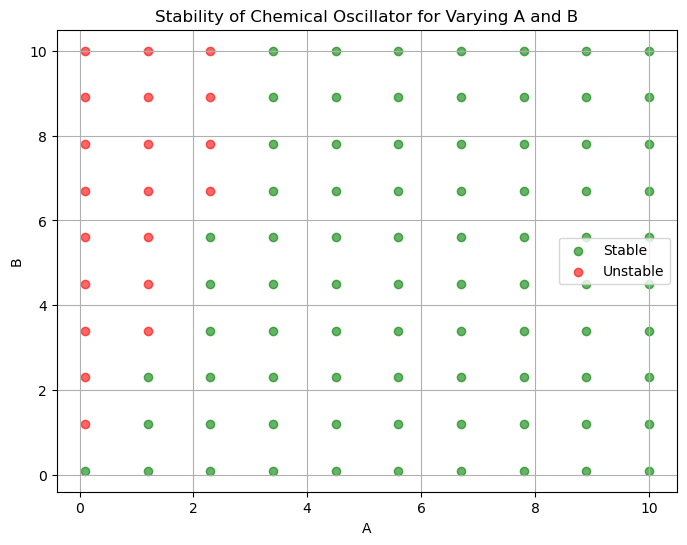

In [306]:
def classify_behavior(A, B, s0, t0, h, tmax, threshold=0.01):
    """
    Classify the behavior of the system based on whether it reaches a steady state or oscillates.
    :param A: Parameter A
    :param B: Parameter B
    :param s0: Initial conditions [X0, Y0]
    :param t0: Initial time
    :param h: Step size
    :param tmax: Maximum time to simulate
    :param threshold: Threshold for considering steady-state behavior
    :return: 'Stable' if steady-state behavior, 'Unstable' if oscillatory behavior
    """
    X_values, Y_values = simulate_oscillator(A, B, s0, t0, h, tmax)

    # check if the difference between successive values is small
    X_diff = np.abs(np.diff(X_values))
    Y_diff = np.abs(np.diff(Y_values))

    if np.max(X_diff) < threshold and np.max(Y_diff) < threshold:
        return 'Stable'
    else:
        return 'Unstable'

def analyze_stability(A_range, B_range, t0, h, tmax):
    results = []
    for A in A_range:
        for B in B_range:
            s0 = [A + 0.001, B / A] 
            stability = classify_behavior(A, B, s0, t0, h, tmax)
            results.append((A, B, stability))
    return results

def plot_stability(results):
    """
    Plot the stability behavior for different values of A and B.
    :param results: List of results [(A, B, stability)]
    """
    stable_A = [result[0] for result in results if result[2] == 'Stable']
    stable_B = [result[1] for result in results if result[2] == 'Stable']
    unstable_A = [result[0] for result in results if result[2] == 'Unstable']
    unstable_B = [result[1] for result in results if result[2] == 'Unstable']

    plt.figure(figsize=(8, 6))
    plt.scatter(stable_A, stable_B, color='green', label='Stable', alpha=0.6)
    plt.scatter(unstable_A, unstable_B, color='red', label='Unstable', alpha=0.6)
    plt.xlabel('A')
    plt.ylabel('B')
    plt.title('Stability of Chemical Oscillator for Varying A and B')
    plt.legend()
    plt.grid(True)
    plt.show()


t0 = 0.0 
h = 0.01 
tmax = 50  

# Define ranges for A and B
A_range = np.linspace(0.1, 10, 10) 
B_range = np.linspace(0.1, 10, 10)  

results = analyze_stability(A_range, B_range, t0, h, tmax)

plot_stability(results)

/var/folders/s3/ndy24kdj28j8g7cg4731vp600000gn/T/ipykernel_6973/1263926778.py:25: RuntimeWarning: overflow encountered in scalar power
  dXdt = A - (B + 1) * X + X**2 * Y
/var/folders/s3/ndy24kdj28j8g7cg4731vp600000gn/T/ipykernel_6973/1263926778.py:26: RuntimeWarning: overflow encountered in scalar power
  dYdt = B * X - X**2 * Y
/var/folders/s3/ndy24kdj28j8g7cg4731vp600000gn/T/ipykernel_6973/1263926778.py:25: RuntimeWarning: overflow encountered in scalar multiply
  dXdt = A - (B + 1) * X + X**2 * Y
/var/folders/s3/ndy24kdj28j8g7cg4731vp600000gn/T/ipykernel_6973/1263926778.py:26: RuntimeWarning: overflow encountered in scalar multiply
  dYdt = B * X - X**2 * Y


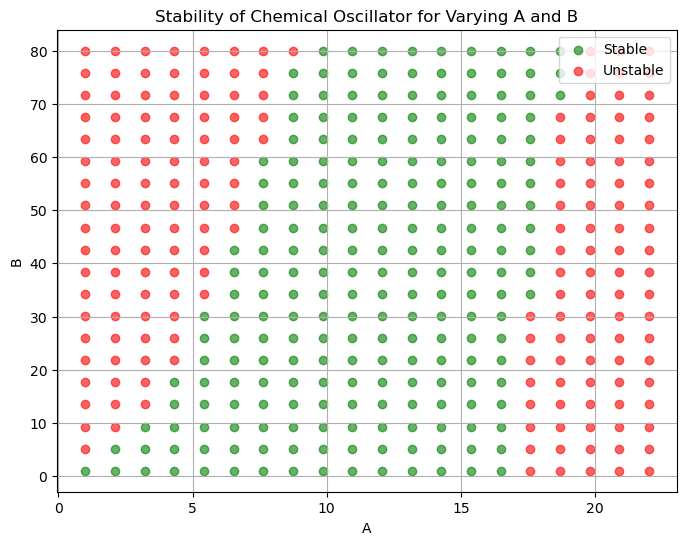

In [366]:
t0 = 0.0 
h = 0.01  
tmax = 50  

A_range = np.linspace(1, 22, 20)  
B_range = np.linspace(1, 80, 20)  

results = analyze_stability(A_range, B_range, t0, h, tmax)

plot_stability(results)